In [1]:
#| output: false
%matplotlib inline
from input_environment_defs import *

Splikes version  0.1.2
Plasticnet version  0.1.6


## Natural Image Input Environment

In order to approximate the visual system, we start with the following basic properties of the retina, LGN and cortex. There are approximately 1000 photoreceptors feeding into 1 ganglion cell [@JeonEtAl1998;@SterlingEtAl1988]. The retina/LGN responses show a center-surround organization, but with a center diameter less than 1$^o$ [@hubel1995eye]

We use natural scene stimuli for the simulated inputs to the visual system. We start with images taken with a digital camera, with dimensions 1200 pixels by 1600 pixels and 40$^o$ by 60$^o$ real-world angular dimensions (Figure @fig-orig). Photoreceptors have a logarithmic response to the stimulus, so we apply the natural logarithm to the pixel values.  Finally, we model the ganglion responses using a 32x32 pixel center-surround difference-of-Gaussians (DOG) filter to process the images, each pixel representing one photoreceptor (Figure @fig-logdog). The center-surround radius ratio used for the ganglion cell is 1:3, with balanced excitatory and inhibitory regions and normalized Gaussian profiles. 


In [2]:
#| output: false

# Make the original image files
make_original_image_files()



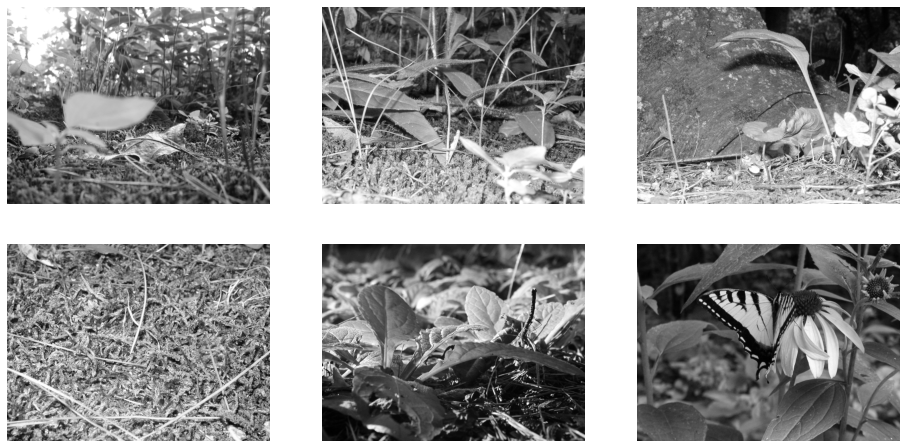

In [3]:
#| label: fig-orig
#| fig-cap: A Small Subset of the Original Natural Images
fname='asdf/bbsk081604_all.asdf'
image_data=pi5.asdf_load_images(fname)
im=[arr.astype(float)*image_data['im_scale_shift'][0]+
        image_data['im_scale_shift'][1] for arr in image_data['im']]
del image_data
plt.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(im[i],cmap=plt.cm.gray)
    plt.axis('off')

In [4]:
#| output: false

# Make the logged image files

if not os.path.exists('asdf/bbsk081604_all_log2dog.asdf'):
    im=[np.log2(I-I.min()+1) for I in var['im']]
    var_log={'im':im,'im_scale_shift':[1.0,0.0]}
    var_norm=filters.make_norm(var_log)
    var_dog=filters.make_dog(var_norm)
    filters.set_resolution(var_dog,'uint16')
    pi5.asdf_save_images(var_dog,'asdf/bbsk081604_all_log2dog.asdf') 
    del var_norm, var_dog, var

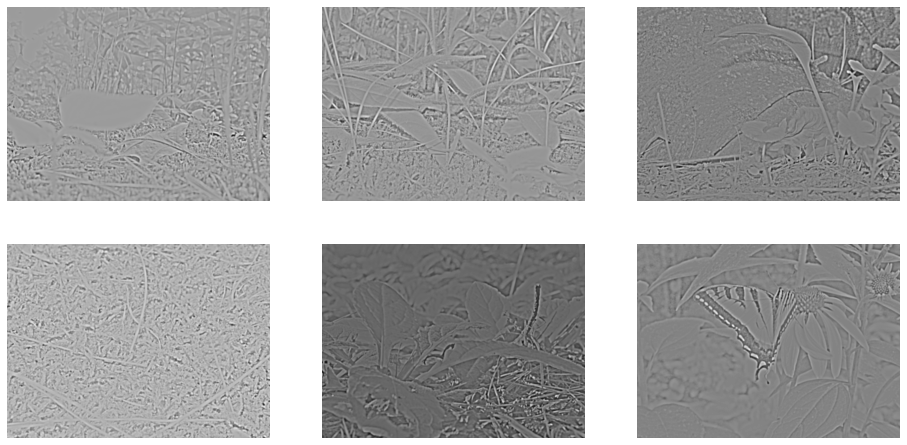

In [5]:
#| label: fig-logdog
#| fig-cap: A Small Subset of the Natural Images filtered with a base-2 Log function and a difference of Gaussians (DOG)

fname='asdf/bbsk081604_all_log2dog.asdf'
image_data=pi5.asdf_load_images(fname)
im=[arr.astype(float)*image_data['im_scale_shift'][0]+
        image_data['im_scale_shift'][1] for arr in image_data['im']]
del image_data
plt.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(im[i],cmap=plt.cm.gray)
    plt.axis('off')

## Two-eye architecture

Shown in Figure @fig-arch is the visual field, approximated here as a two-dimensional projection, to left and right retinal cells. These left and right retinal cells project to the left and right LGN cells, respectively, and finally to a single cortical cell. The LGN is assumed to be a simple relay, and does not modify the incoming retinal activity.  It is important to understand that the model we are pursuing here is a *single cortical cell* which receives input from both eyes.  We will encounter some limitations to this model which may necessitate exploring multi-neuron systems.  

In the model, normal development is simulated with identical image patches presented to both eyes combined with small independent noise in each eye.  The random noise is generated from a zero-mean normal distribution of a particular variance, representing the natural variation in responses of LGN neurons. Practically, the independent random noise added to each of the two-eye channels avoids the artificial situation of having mathematically identical inputs in the channels.  The development of the deficit and the subsequent treatment protocols are modeled with added preprocessing to these image patches, described later in @sec-models-of-development and @sec-models-of-treatments.

For all of the simulations we use a 19x19 receptive field, which is a compromise between speed of simulation and the limits of spatial discretization.  We perform at least 20 independent simulations for each condition to address variation in the results.



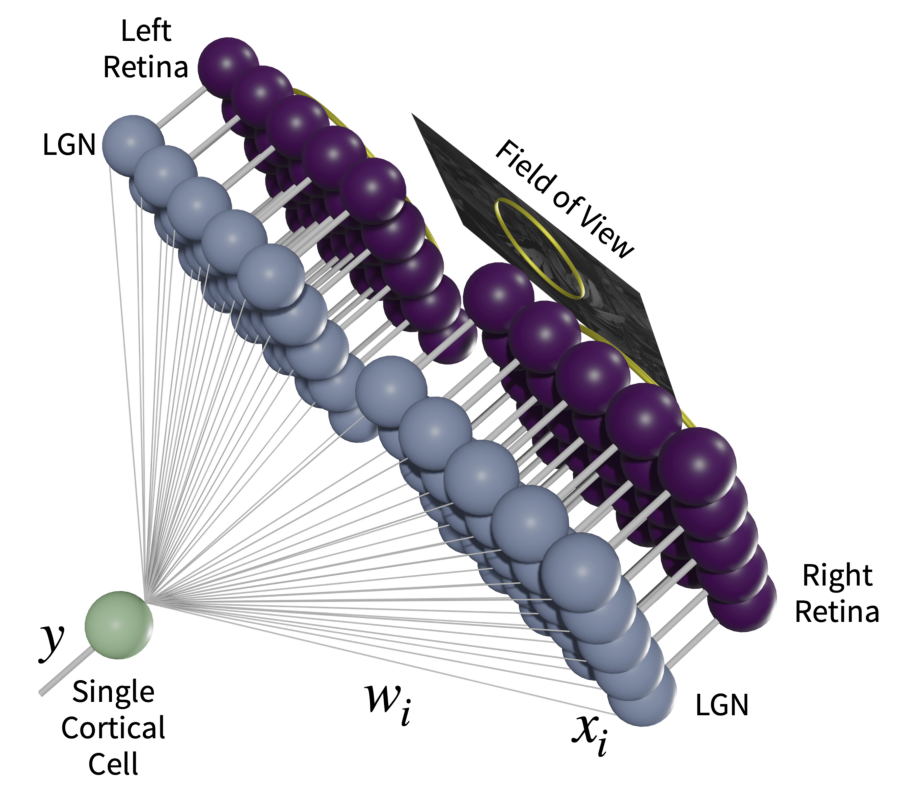

In [6]:
#| output: false
#| echo: false 

# doing this so that I can see the image in jupyter but also
# take advantage of the quarto auto select png/pdf render
plt.figure(figsize=(16,16))
plt.imshow(Image.open('resources/arch.png'))
plt.axis('off');

![Two-eye Architecture.](resources/arch){#fig-arch}

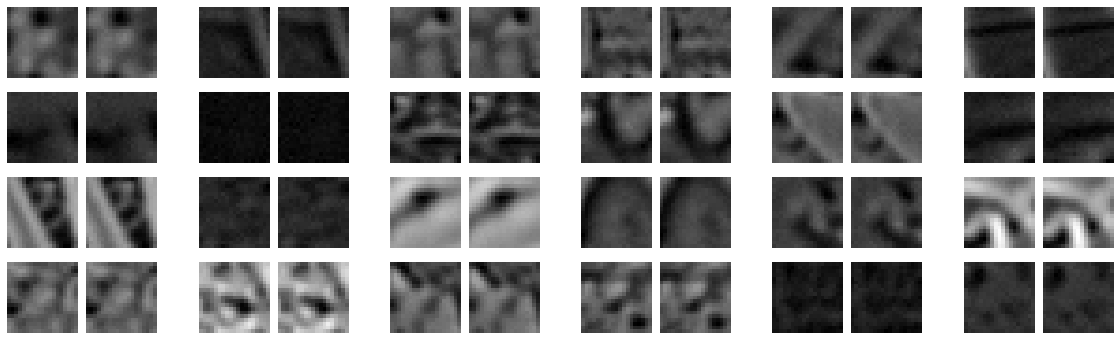

In [8]:
#| label: fig-normal-inputs
#| fig-cap: A sample of 24 input patches from a normal visual environment. The left- and right-eye inputs are shown in pairs.
#| 
sim,X=get_input_patch_examples(blur=-1)
ims=inputs_to_images(X,buffer=2)
figure(figsize=(20,6))
for i in range(24):
    im=ims[i]
    subplot(4,6,i+1)
    imshow(im,cmap=plt.cm.gray)
    axis('off')
    